In [187]:
import pandas as pd
import numpy as np
from scipy import stats
data = pd.read_csv('Project_data.csv')  

In [188]:
data['t'] = data.groupby(['API']).cumcount()
max_t = max(data['t'])

In [189]:
#drop the outlier
q = data["oil"].quantile(0.01)
data_clean = data[data["oil"] > q]

In [194]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

In [195]:
from scipy import optimize
def func(x, q0,D0, D1, b, t1):
    #t1 = 10
    return np.piecewise(x, [x < t1, x >= t1], [lambda x: q0 * np.exp(D0 * x), lambda x: q0 * np.exp(D0 * t1)/(1 + b*D1*np.power(x-t1, 1/b))])


In [204]:
#for well in data['API'].unique():
well = data['API'].unique()[4]
subdata = data_clean[data_clean['API'] == well]
x = np.array(subdata['t'])
y = np.array(subdata['oil'])
p , e = curve_fit(func, x, y)
#result = differential_evolution(rosen, bounds)

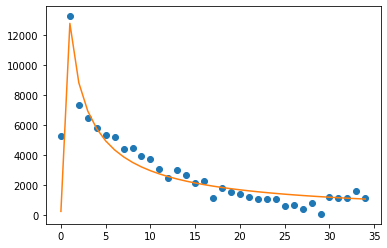

In [205]:
import matplotlib.pyplot as plt
plt.plot(x, y, "o")
plt.plot(x, func(x, *p))

In [198]:
result = func(x, *p)
bounds = [1, max_t]
result = differential_evolution(func, bounds)

IndexError: tuple index out of range

In [185]:
result

array([4744, 3167, 2569, 2202, 1945, 1753, 1601, 1290, 1216, 1151, 1094,
       1043,  998,  957,  920,  886,  855,  826,  800,  775,  752,  731,
        711,  693,  658,  643,  614,  601,  588,  576,  565,  554])

In [143]:
import calendar
data['month'] = data['month'].map(lambda x: x[0].upper() + x[1::].lower())
month_map = {calendar.month_abbr[x]:x for x in range(1,13)}
data['month'] = data['month'].apply(lambda x: month_map[x])

In [83]:
data['year'] = data['year'].astype(str) + data['month'].astype(str)